# Project: No-show appointments dataset

Michelle Leemans (May, 2020)

## Table of contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Wrangling">Data wrangling</a></li>
<li><a href="#eda">Answer two Questions by visualization of the data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
In this project I investigate a dataset entitled no-show appointments. This dataset assembles information > 100 000 K medical appointments in Brazil and is concentrated on the question whether or not patients get in for their appointments. Various characteristics about the patient are included within the dataset, including: 

1. Patient ID
1. Appointment ID
1. Gender
1. The scheduled day of the appointment
1. The date of the actual appointment
1. The age of the patient
1. The location of the hospital
1. If the patient is enrolled in Brazilian welfare program
1. If the patient suffers from hypertension, diabetes, a certain handicap or alcoholism
1. Whether or not the patient showed up to the appointment
1. The location of the hospital
1. If the patient received any SMS-reminder or not

<a id='Wrangling'></a>
## Data Wrangling


**Import all necesarry libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



**Load data and show first 5 lines of the datasset.** 

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(df.head(5))





      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      


**Print statistics about the dataset**


In [4]:
print(df.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

**Print the size of the dataset.** 

In [5]:
print(df.shape)

(110527, 14)


There are 110527 records and 14 columns in the dataset. 

**Print some histograms from the dataset** 

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023ED7D825C8>


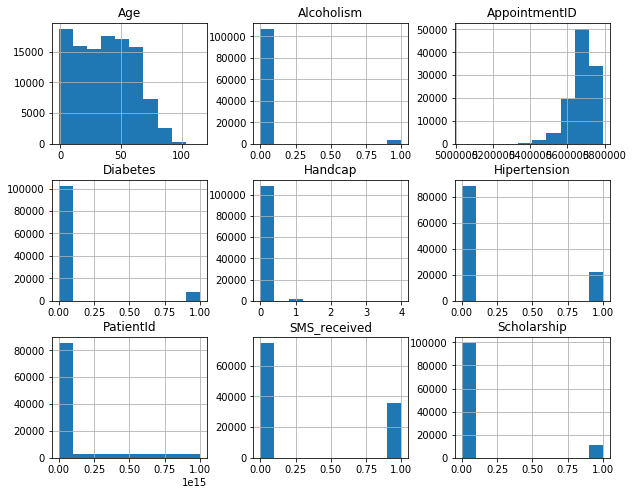

In [6]:
print(df.hist(figsize=(10,8)));

**Checking for null values**

In [7]:
pd.isna(df).sum()
# The data has no null values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Print another view of the dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**First observations made:**
1. The dataset does not contain any missing values.
1. The patientid is a float and should be an integer.
1. The sheduledday and appointment day column types should be converted to datetime.
1. There are typos in the column names and confusing capital letters.
1. No column containing the time between the date appointment made and the actual appointment.
1. There are negative values in the age, this is not possible and will be replaced by the mean age.



**Observation 2: The patient is a float and should be an integer**

In [9]:
df['PatientId']=df['PatientId'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int32 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int32(1), int64(8), object(5)
memory usage: 11.4+ MB


**Observation 3: Fixing the datetime datatypes in ScheduleDay and AppointmentDay**

In [10]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int32              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

**Observation 4: Fixing typos in data column names and make column names all lower case**

In [11]:
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace = True)
df.columns = map(str.lower, df.columns)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Observation 5: Create a new column containing the awaiting_time_in_days**

In [12]:
df['awaiting_time_in_days']=(df.appointmentday - df.scheduledday).dt.days
print(df.info())
print(df['awaiting_time_in_days'].mean())
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   patientid              110527 non-null  int32              
 1   appointmentid          110527 non-null  int64              
 2   gender                 110527 non-null  object             
 3   scheduledday           110527 non-null  datetime64[ns, UTC]
 4   appointmentday         110527 non-null  datetime64[ns, UTC]
 5   age                    110527 non-null  int64              
 6   neighbourhood          110527 non-null  object             
 7   scholarship            110527 non-null  int64              
 8   hypertension           110527 non-null  int64              
 9   diabetes               110527 non-null  int64              
 10  alcoholism             110527 non-null  int64              
 11  handicap               110527 non-null 

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,awaiting_time_in_days
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


On average there are 9 days between the appointment day and the scheduled day. 

### Printing of unique values to see if all the data fits

**Patient id - unique values**

In [13]:
print('The unique values in the `Patient ID` column are: {}'.format(df['scholarship'].unique()))

The unique values in the `Patient ID` column are: [0 1]


**Hypertension - unique values**

In [14]:
print('The unique values in the `hypertension` column are: {}'.format(df['hypertension'].unique()))

The unique values in the `hypertension` column are: [1 0]


**Diabetes - unique values**

In [15]:
print('The unique values in the `Diabetes` column are: {}'.format(df['diabetes'].unique()))

The unique values in the `Diabetes` column are: [0 1]


**Alcoholism - unique values**

In [16]:
print('The unique values in the `Alcoholism` column are: {}'.format(df['alcoholism'].unique()))

The unique values in the `Alcoholism` column are: [0 1]


**Handicap - unique values**

In [17]:
print('The unique values in the `Handicap` column are: {}'.format(df['handicap'].unique()))

The unique values in the `Handicap` column are: [0 1 2 3 4]


**Sms received or not - unique values**

In [18]:
print('The unique values in the `sms_received` column are: {}'.format(df['sms_received'].unique()))

The unique values in the `sms_received` column are: [0 1]


**Gender - unique values**

In [19]:
print('The unique values in the `Gender` column are: {}'.format(df['gender'].unique()))

The unique values in the `Gender` column are: ['F' 'M']


**Age - unique values**

In [20]:
print('The unique values in the `Age` column are: {}'.format(df['age'].unique()))

The unique values in the `Age` column are: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


No age of -1 or 0 possible so this needs to be solved. I will replace the negative values by its absolute value and the 0 ages I will replace them by 1.  

In [21]:
# absolute values
df['age'] = df['age'].abs()

#replace 0 by 1 
df[df['age'] == 0 ] = 1
print('The unique values in the `Age` column are: {}'.format(df['age'].unique()))

The unique values in the `Age` column are: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   1   3  69  68  60  67  36  10  35  20  26
  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75  73
  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90  94
  86  91  98  92  96  93  95  97 102 115 100  99]


**Appointment_day - unique values**

In [22]:
print('The unique values in the `Appointment_day` column are: {}'.format(df['appointmentday'].unique()))

The unique values in the `Appointment_day` column are: [Timestamp('2016-04-29 00:00:00+0000', tz='UTC') 1
 Timestamp('2016-05-03 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-10 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-17 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-24 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-31 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-02 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-30 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-16 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-04 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-19 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-12 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-06 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-20 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-05 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-13 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-09 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-25 00:00:00+0000', tz='UTC')
 Timestamp('2016-05-11 00:00:00+0000', tz='UTC')
 Timestamp('

**Scheduled_day - unique values**

In [23]:
print('The unique values in the `Scheduled_day` column are: {}'.format(df['scheduledday'].unique()))

The unique values in the `Scheduled_day` column are: [Timestamp('2016-04-29 18:38:08+0000', tz='UTC')
 Timestamp('2016-04-29 16:08:27+0000', tz='UTC')
 Timestamp('2016-04-29 16:19:04+0000', tz='UTC') ...
 Timestamp('2016-04-27 16:03:52+0000', tz='UTC')
 Timestamp('2016-04-27 15:09:23+0000', tz='UTC')
 Timestamp('2016-04-27 13:30:56+0000', tz='UTC')]


**Awaiting_time_in_days - unique values**

In [24]:
print('The unique values in the `Awaiting_time_in_days` column are: {}'.format(df['awaiting_time_in_days'].unique()))

The unique values in the `Awaiting_time_in_days` column are: [ -1   1   2   0   3   8  28   9  22  10  17  16  13  27  23  20  14  15
  21  42  29  30  41  31  55  44  45  38  36  37  43  49  59  51  52  64
  66  90  65  83  77  86 114 108  62  69  71  56  57  50  58  40  72  63
  19  48  32  33   5  34  35  11  12  39  46   7   4   6  24  25  47  26
  18  60  54  61 175  76  68  75  88  80  78  53  67  74  84 111  -2  79
  85  97  93  82 141 154 161 168 103 132 124  95  87  89 150 125 126 110
 118  73  70  81 102 107 109 101 121 100 104  91  96  92 106  94  -7 138
 131 178 116 145 122]


I will replace the negative values by its absolute value

In [25]:
# absolute values
df['awaiting_time_in_days'] = df['awaiting_time_in_days'].abs()
df['awaiting_time_in_days'].unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  72,
        63,  19,  48,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  76,  68,
        75,  88,  80,  78,  53,  67,  74,  84, 111,  79,  85,  97,  93,
        82, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150, 125,
       126, 110, 118,  73,  70,  81, 102, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122], dtype=int64)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Is there a differenc in gender distribution for show / no-show patients?

Prepare the numbers for the graph:
1. Total appointments male and female patients
1. Missed appointments male and female patients
1. Ratio of missed appointments to total appointments for both male and female patients

In [38]:
total_f_appointments=len(df.loc[df['gender'] == 'F'])
total_m_appointments=len(df.loc[df['gender']=='M'])

missed_f_appointments=len(df.query('no_show == "Yes" and gender =="F"'))
missed_m_appointments=len(df.query('no_show == "Yes" and gender =="M"'))

missed_f_ratio=int((missed_f_appointments/total_f_appointments)*100)
missed_m_ratio=int((missed_m_appointments/total_m_appointments)*100)



Code for the graphic:

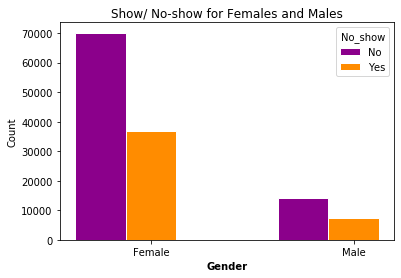

Out of the 70119 total appointments made by females, 14275 were missed with the ratio of 20%.
Out of 36869 total appointments made by males, 7405 were missed with the ratio of 20%.


In [27]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [total_f_appointments,missed_f_appointments]
bars2 = [total_m_appointments,missed_m_appointments]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


# Make the plot
plt.bar(r1, bars1, color='#8B008B', width=barWidth, edgecolor='white', label='No')
plt.bar(r2, bars2, color='#FF8C00', width=barWidth, edgecolor='white', label='Yes')
 
# Add xticks 
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Count')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Female', 'Male'])

plt.title('Show/ No-show for Females and Males')

# Create legend & Show graphic
plt.legend(title='No_show')
plt.show()

print('Out of the {} total appointments made by females, {} were missed with the ratio of {}%.'.format(total_f_appointments, missed_f_appointments, missed_f_ratio))
print('Out of {} total appointments made by males, {} were missed with the ratio of {}%.'.format(total_m_appointments, missed_m_appointments, missed_m_ratio))

I do not find how to put the female and male x-ticks in the middle. 

### Research Question 2 : Do the no-shows have a larger timeframe between schedule date and appointment date?

Investigate the timeframe between schedule date and appointment date

In [28]:
df['awaiting_time_in_days'].describe()


count    110527.000000
mean          9.577732
std          14.667967
min           0.000000
25%           1.000000
50%           3.000000
75%          13.000000
max         178.000000
Name: awaiting_time_in_days, dtype: float64

Make bins for low- , medium-, moderate_high- and high-time between schedule date and appointment date. These bins will be used to possibly correlate between absence to a doctors appointment and time between schedule and appointment date. 

In [29]:
# code to make the bins of awaiting time in days 
bin_edges=[-1,1,3,14,178]
bin_names=['low','medium','moderate_high','high']

df['awaiting_time_in_days_category']=pd.cut(df['awaiting_time_in_days'], bin_edges, labels= bin_names)


Prepare the numbers for the graph:
1. Total appointments with high, moderate_high, medium and low awaiting time 
1. Missed appointments with high, moderate_high, medium and low awaiting time 
1. Ratio of missed appointments to total appointments with high, moderate_high, medium and low awaiting time 

In [30]:

total_appointments_high_awaiting_time=len(df.loc[df['awaiting_time_in_days_category'] == 'high'])
total_appointments_moderate_high_awaiting_time=len(df.loc[df['awaiting_time_in_days_category'] == 'moderate_high'])
total_appointments_medium_awaiting_time=len(df.loc[df['awaiting_time_in_days_category'] == 'medium'])
total_appointments_low_awaiting_time=len(df.loc[df['awaiting_time_in_days_category'] == 'low'])

missed_appointments_high_waiting_time=len(df.query('no_show == "Yes" and awaiting_time_in_days_category =="high"'))
missed_appointments_moderate_high_waiting_time=len(df.query('no_show == "Yes" and awaiting_time_in_days_category =="moderate_high"'))
missed_appointments_medium_waiting_time=len(df.query('no_show == "Yes" and awaiting_time_in_days_category =="medium"'))
missed_appointments_low_waiting_time=len(df.query('no_show == "Yes" and awaiting_time_in_days_category =="low"'))

missed_ratio_high_waiting_time=int((missed_appointments_high_waiting_time/total_appointments_high_awaiting_time)*100)
missed_ratio_moderate_high_time=int((missed_appointments_moderate_high_waiting_time/total_appointments_moderate_high_awaiting_time)*100)
missed_ratio_medium_waiting_time=int((missed_appointments_medium_waiting_time/total_appointments_medium_awaiting_time)*100)
missed_ratio_low_waiting_time=int((missed_appointments_low_waiting_time/total_appointments_low_awaiting_time)*100)






Code for the graphic

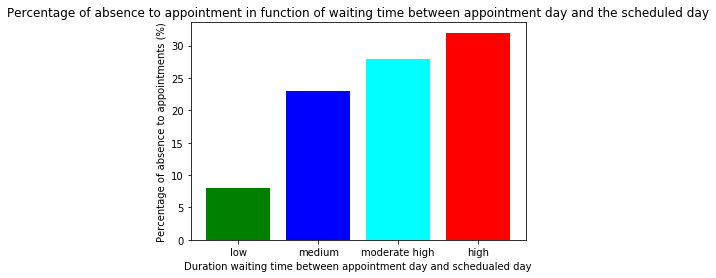

In [31]:
locations = [1,2,3,4]
heights = [missed_ratio_low_waiting_time,missed_ratio_medium_waiting_time,missed_ratio_moderate_high_time,missed_ratio_high_waiting_time]
labels = ['low', 'medium', 'moderate high', 'high']
colors = [ 'green', 'blue', 'cyan', 'red'] 


plt.bar(locations, heights, tick_label = labels, color=colors)
plt.title('Percentage of absence to appointment in function of waiting time between appointment day and the scheduled day')
plt.xlabel ('Duration waiting time between appointment day and schedualed day')
plt.ylabel ('Percentage of absence to appointments (%)');



Small conclusion:

In [37]:
da= missed_ratio_high_waiting_time/missed_ratio_low_waiting_time
print('A high time difference between the appointment day and the scheduled day increases {} times the chance of missing an appointment compared to a low time difference between the actual scheduled day and the appointment day.'.format(da))

A high time difference between the appointment day and the scheduled day increases 4.0 times the chance of missing an appointment compared to a low time difference between the actual scheduled day and the appointment day.


<a id='conclusions'></a>
## Conclusions

Firstly, I unified names, corrected typos, converted to correct  datatypes, fixed wrong data and I added a new feature based on existing data. 

Secondly, I addressed two questions and answered these questions with employing a graphic.

In a first question I identified whether there is a gender difference in the shows/no-shows at the doctors appointment. 
From the data I diagnosed that:
1. Out of the 70119 total appointments made by females, 14275 were missed with the ratio of 20%.
1. Out of 36869 total appointments made by males, 7405 were missed with the ratio of 20%.
This indicates that there is no gender difference in the shows/no-shows at the doctors appointments within the dataset.

In a second question I addressed whether the no-shows have a larger timeframe between schedule date and appointment date.
From the data I could conclude that: 

A high time difference between the appointment day and the scheduled day increases 4.0 times the chance of missing an appointment compared to a low time difference between the actual scheduled day and the appointment day.
